# Visualizing ZDF files

This notebook can be used to quickly visualize ZDF files.

## Main routines

### Grid data

* `grid2d` - Open a `.zdf` grid file and produce a 2D (colormap) plot
* `vfield2d` - Open a 2 grid files and produce a field magnitude plot

### Particle data

* `part2D` - Open a `.zdf` particle file and produce a 2D (scatter) plot with the selected quantities
* `histogram` - Open a `.zdf` particle file and produce a histogram plot of the selected quantity

## Example

Visualize file `test-000000.zdf`:

```python
import visxd
visxd.grid2d( "test-000000.zdf" )
```


## Utilities

The following routines are meant to simplify access to specific quantities / timesteps:

* `plot_data( fld, iter, ...)` - Plots 1D / 2D scalar data. The parameter `fld` correponds to the complete file path up to the '-' character that separates the iteration number, e.g. "EMF/Jx".
* `plot_vfield2d( fld, iter, ...)` - Generates 2 plots, 1 for the magnitude of the in-plane field and another one for the out of plane field. The parameter `fld` correponds to the complete file path up to the character that specifies the field component, just befor the '-' character separates the iteration number, e.g. "EMF/B".

The iteration parameter, `iter`, will be converted to a six digit string of the usual format to create the complete file name. The routines also accept additional parameters that are passed on to the `visxd` backend, e.g.:

```python
plot_vfield2d( "EMF/E", xlim = (0., 2.))
```

In [1]:
import visxd
import os.path
import sys

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]

import matplotlib.colors as colors




## Mushroom

Plotting EMF/B in plane field for iteration 1200.


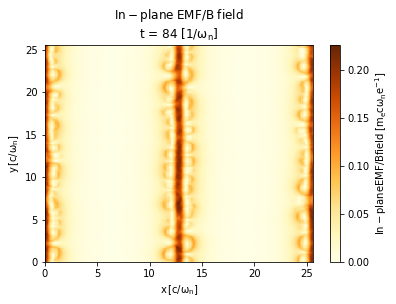

Plotting EMF/B out of plane field for iteration 1200.


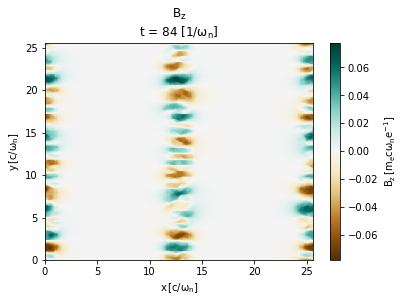

Plotting CHARGE/ions-up/ions-up-charge-001200.zdf


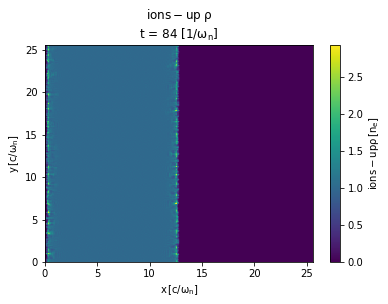

Plotting CHARGE/ions-down/ions-down-charge-001200.zdf


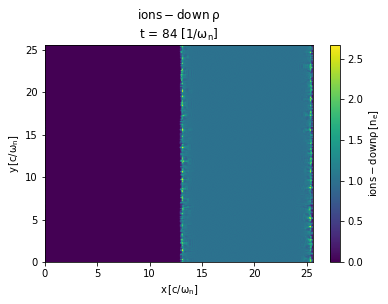

Plotting CHARGE/electrons-up/electrons-up-charge-001200.zdf


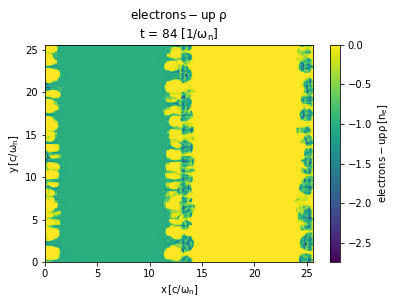

Plotting CHARGE/electrons-down/electrons-down-charge-001200.zdf


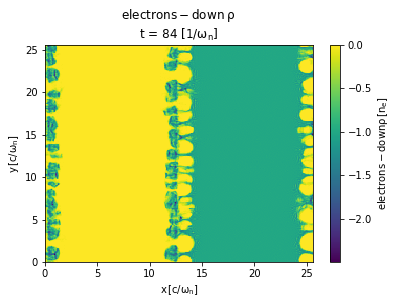

In [26]:
import visxd

xlim = None
iter = 1200
visxd.plot_vfield2d("EMF/B", iter, xlim = xlim  )
visxd.plot_data("CHARGE/ions-up/ions-up-charge", iter, xlim = xlim )
visxd.plot_data("CHARGE/ions-down/ions-down-charge", iter, xlim = xlim )
visxd.plot_data("CHARGE/electrons-up/electrons-up-charge", iter, xlim = xlim )
visxd.plot_data("CHARGE/electrons-down/electrons-down-charge", iter, xlim = xlim )


## Kelvin-Helmholtz

Plotting EMF/E in plane field for iteration 600.


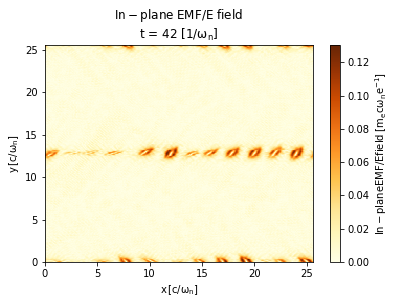

Plotting EMF/E out of plane field for iteration 600.


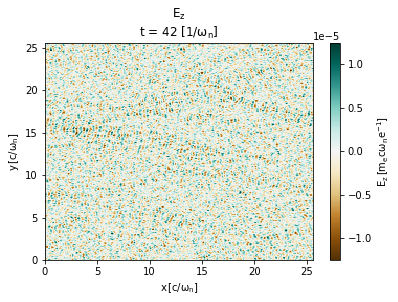

Plotting CURRENT/J in plane field for iteration 600.


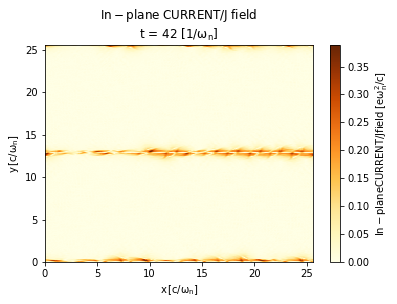

Plotting CURRENT/J out of plane field for iteration 600.


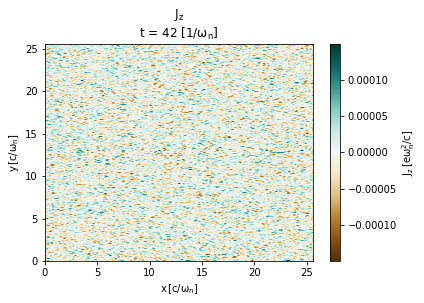

Plotting CHARGE/ions-r/ions-r-charge-000600.zdf


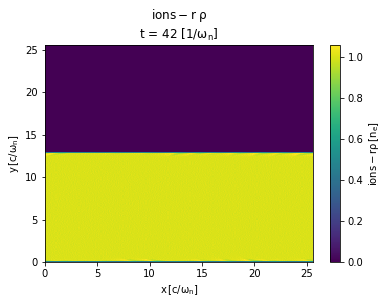

Plotting CHARGE/ions-l/ions-l-charge-000600.zdf


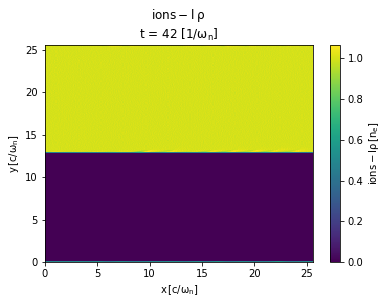

Plotting CHARGE/electrons-r/electrons-r-charge-000600.zdf


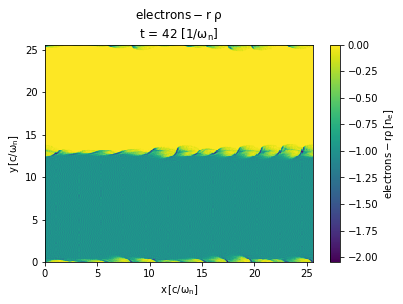

Plotting CHARGE/electrons-l/electrons-l-charge-000600.zdf


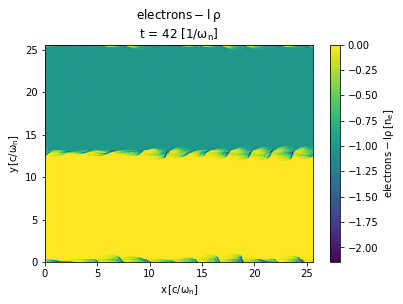

In [2]:
import visxd

xlim = None
iter = 600
visxd.plot_vfield2d("EMF/E", iter, xlim = xlim  )
visxd.plot_vfield2d("CURRENT/J", iter, xlim = xlim  )
visxd.plot_data("CHARGE/ions-r/ions-r-charge", iter, xlim = xlim )
visxd.plot_data("CHARGE/ions-l/ions-l-charge", iter, xlim = xlim )
visxd.plot_data("CHARGE/electrons-r/electrons-r-charge", iter, xlim = xlim )
visxd.plot_data("CHARGE/electrons-l/electrons-l-charge", iter, xlim = xlim )